**Question One**

In [1]:
# Install package for obtaining USGS streamflow data
!pip install -U dataretrieval

In [6]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '08329918'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2021-01-01', end='2022-01-01')
df

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2021-01-01 00:00:00+00:00,495.0,"A, e",08329918
2021-01-02 00:00:00+00:00,498.0,"A, e",08329918
2021-01-03 00:00:00+00:00,502.0,"A, e",08329918
2021-01-04 00:00:00+00:00,499.0,"A, e",08329918
2021-01-05 00:00:00+00:00,499.0,"A, e",08329918
...,...,...,...
2021-12-28 00:00:00+00:00,538.0,P,08329918
2021-12-29 00:00:00+00:00,625.0,P,08329918
2021-12-30 00:00:00+00:00,620.0,P,08329918


<AxesSubplot:xlabel='datetime'>

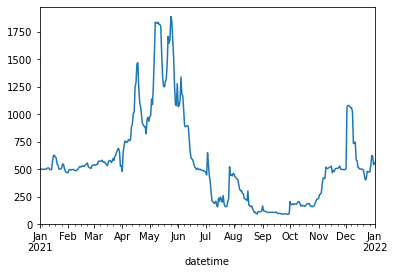

In [7]:
# Simple plot
df['00060_Mean'].plot()

My plot shows the mean daily flow from the Rio Grande River where it meets Alameda Blvd in Albuquerque, NM for the year of 2021. The spike at the end of July 2021 represents a flash flood that occurred through much of Albuquerque. It killed three people on July 23, making it the deadliest single flash flood in the city's history. The flooding continued through the rest of the month and into August. 

https://www.usnews.com/news/best-states/new-mexico/articles/2021-07-23/albuquerque-official-3-dead-in-flash-flood-was-worst-ever

**Question Two**

In [8]:
# Specify the USGS site code
# riogrande at alameda, willamette at portland, and southeplatte at englewood denver
riogrande = '08329918'
willamette = '14211720'
splatte = '06711565'

rivers = [riogrande, willamette, splatte]

In [9]:
rg_df = nwis.get_record(sites=riogrande, service='dv', start='2020-10-31', end='2021-09-30')
w_df = nwis.get_record(sites=willamette, service='dv', start='2020-10-31', end='2021-09-30')
sp_df = nwis.get_record(sites=splatte, service='dv', start='2020-10-31', end='2021-09-30')

rg_mean = rg_df['00060_Mean'].mean()
w_mean = w_df['00060_Mean'].mean()
sp_mean = sp_df['00060_Mean'].mean()

rg_name = 'RIO GRANDE AT ALAMEDA BRIDGE AT ALAMEDA, NM'
w_name = 'WILLAMETTE RIVER AT PORTLAND, OR'
sp_name = 'SOUTH PLATTE RIVER AT ENGLEWOOD, CO.'

In [10]:
print(rg_mean, w_mean, sp_mean)

572.5405970149254 27817.34328358209 140.05671641791045


<table>
  <tr>
    <th>site_no</th>
    <th>name</th>
    <th>mean_flow</th>
  </tr>
  <tr>
    <td>08329918</td>
    <td>RIO GRANDE AT ALAMEDA BRIDGE AT ALAMEDA, NM</td>
    <td>572.54</td>
  </tr>
  <tr>
    <td>14211720</td>
    <td>WILLAMETTE RIVER AT PORTLAND, OR</td>
    <td>27928.288</td>
  </tr>
    <tr>
    <td>0671156</td>
    <td>SOUTH PLATTE RIVER AT ENGLEWOOD, CO.</td>
    <td>140.05</td>
  </tr>
</table>

**Question Three**

In [11]:
# Import packages
import numpy as np
import pandas as pd
import folium
import re

In [12]:
# Extract mountain data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
mountain_stats = mountains[1]
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

In [13]:
# Return only mountains that have an elevation higher than 3000m

index = 0
tall_mountains = pd.DataFrame()

for row in mountain_stats.iterrows():
    
    if float(re.findall(r'\d+\.?\d', row[1][3])[0]) < 3000:
        mountain_stats = mountain_stats.drop(index)
        
    index += 1

mountain_stats

,Rank,Mountain peak,Mountain range,Elevation,Prominence,Isolation,Location
0,1,Mount Hood[6][7][8][9][a],Cascade Range,3428.8 m,2349 m,92.2 km,45°22′25″N 121°41′45″W﻿ / ﻿45.3735°N 121.6959°W
1,2,Mount Jefferson[10][11][12][13][b],Cascade Range,3201 m,1767 m,77.5 km,44°40′27″N 121°47′59″W﻿ / ﻿44.6743°N 121.7996°W
2,3,South Sister[14][15][16][17],Cascade Range,3158.5 m,1705 m,63.4 km,44°06′13″N 121°46′09″W﻿ / ﻿44.1035°N 121.7693°W
3,4,North Sister[18][19][20][21][c],Cascade Range,3075 m,837 m,7 km,44°10′00″N 121°46′20″W﻿ / ﻿44.1666°N 121.7723°W
4,5,Middle Sister[22][23][24][25][d],Cascade Range,3064 m,382 m,1.8 km,44°08′54″N 121°47′02″W﻿ / ﻿44.1483°N 121.7840°W
5,6,Sacajawea Peak[26][27][28][e][f],Wallowa Mountains,3000 m,1949 m,202 km,45°14′42″N 117°17′34″W﻿ / ﻿45.2450°N 117.2929°W


In [14]:
# Get coordinates for these mountains
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))
coords

[(45.3735, -121.6959),
 (44.6743, -121.7996),
 (44.1035, -121.7693),
 (44.1666, -121.7723),
 (44.1483, -121.784),
 (45.245, -117.2929)]

In [15]:
# Get isolation for these mountains
isolation = []
for i in range(len(mountain_stats)):
    iso = float(mountain_stats['Isolation'].iloc[i][:-2])
    isolation.append(iso)
isolation

[92.2, 77.5, 63.4, 7.0, 1.8, 202.0]

In [16]:
# Get names of the mountains
names = []
for i in range(len(mountain_stats)):
    name = str(re.findall(r'[a-zA-Z]+\s[a-zA-Z]+', mountain_stats['Mountain peak'][i])[0])
    names.append(name)
names

['Mount Hood',
 'Mount Jefferson',
 'South Sister',
 'North Sister',
 'Middle Sister',
 'Sacajawea Peak']

In [17]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    s = f'{names[i]}: {isolation[i]}'
    folium.Marker(coords[i], popup=s).add_to(map)
map

***Question Four***

In [105]:
# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
!pip3 install webdriver_manager

SyntaxError: invalid syntax (1517441071.py, line 3)

In [18]:
# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

In [19]:
# Define addresses
addys = ['1844 SW Morrison St, Portland, OR 97205', '800 Occidental Ave S, Seattle, WA 98134', 
         '1001 Stadium Dr, Inglewood, CA 90301', '2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

In [41]:
coords = []
import time

# Loop through every ski resort to find it's coordinates
for place in addys:
    print(place)
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + place + ' Oregon/'
    print(url)
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    time.sleep(2)
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    element.click()
    time.sleep(2)
    
    # Retrieve the URL
    link = driver.current_url
    print(link)
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    print(lat, lon)
    
    # Append to list
    coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======


1844 SW Morrison St, Portland, OR 97205
https://www.google.com/maps/place/1844 SW Morrison St, Portland, OR 97205 Oregon/


Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\sshul\.wdm\drivers\chromedriver\win32\98.0.4758.102]


https://www.google.com/maps/place/1844+SW+Morrison+St,+Portland,+OR+97205/@45.5216776,-122.693017,17z/data=!4m5!3m4!1s0x54950a1da0e05f85:0x84475d3324378445!8m2!3d45.5216776!4d-122.6908283
45.5216776 -122.693017




====== WebDriver manager ======


800 Occidental Ave S, Seattle, WA 98134
https://www.google.com/maps/place/800 Occidental Ave S, Seattle, WA 98134 Oregon/


Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\sshul\.wdm\drivers\chromedriver\win32\98.0.4758.102]


https://www.google.com/maps/place/Lumen+Field/@47.5951518,-122.3338281,17z/data=!4m5!3m4!1s0x54906aa3b9f1182b:0xa636cd513bba22dc!8m2!3d47.5951518!4d-122.3316394
47.5951518 -122.3338281




====== WebDriver manager ======


1001 Stadium Dr, Inglewood, CA 90301
https://www.google.com/maps/place/1001 Stadium Dr, Inglewood, CA 90301 Oregon/


Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\sshul\.wdm\drivers\chromedriver\win32\98.0.4758.102]


https://www.google.com/maps/place/SoFi+Stadium/@33.9534651,-118.3412283,17z/data=!4m5!3m4!1s0x80c2b786cbfb8f4f:0x5fb99cb7249e4170!8m2!3d33.9534651!4d-118.3390396
33.9534651 -118.3412283




====== WebDriver manager ======


2700 Martin Luther King Jr Blvd, Eugene, OR 97401
https://www.google.com/maps/place/2700 Martin Luther King Jr Blvd, Eugene, OR 97401 Oregon/


Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\sshul\.wdm\drivers\chromedriver\win32\98.0.4758.102]


https://www.google.com/maps/place/2700+Martin+Luther+King+Jr+Blvd,+Eugene,+OR+97401/@44.0594287,-123.0710918,17z/data=!4m5!3m4!1s0x54c0e1e26ad2697b:0xdfb621cc4e3608a2!8m2!3d44.0594287!4d-123.0689031
44.0594287 -123.0710918


In [42]:
coords

[('45.5216776', '-122.693017'),
 ('47.5951518', '-122.3338281'),
 ('33.9534651', '-118.3412283'),
 ('44.0594287', '-123.0710918')]

In [44]:
map = folium.Map(location=[44, -121], zoom_start=1)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=addys[i]).add_to(map)
map

***Question Five***

In [23]:
# Import package
import xarray as xr

# Define filepath
fp = r'C:\Users\sshul\Documents\GitHub\geospatial-data-science\labs\lab7\lab7'

# Read data
xds = xr.open_dataset(fp + '\era_monthly_snowfall_2020.nc', decode_coords='all')

In [25]:
# Define locations
mountains = ['Mount Ashland', 'Willamette Pass Oregon', 'Hoodoo Oregon']

In [26]:
coordss = []

# Loop through every ski resort to find it's coordinates
for place in mountains:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + place + ' Oregon/'
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    coordss.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\sshul\.wdm\drivers\chromedriver\win32\98.0.4758.102]


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\sshul\.wdm\drivers\chromedriver\win32\98.0.4758.102]


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\sshul\.wdm\d

In [64]:
i = 0
sums = []
for i in range(len(coordss)):
    lat = coordss[i][0] #round(float(coordss[i][0])*4)/4
    lon = coordss[i][1]
    loc = xds.sel(longitude=lon, latitude=lat, method='nearest')
    sm = loc.sum(dim = 'time')
    sums.append(sm)
sums

[<xarray.Dataset>
 Dimensions:    ()
 Coordinates:
     longitude  float32 -122.8
     latitude   float32 42.0
 Data variables:
     sf         float32 0.009229,
 <xarray.Dataset>
 Dimensions:    ()
 Coordinates:
     longitude  float32 -122.0
     latitude   float32 43.5
 Data variables:
     sf         float32 0.01964,
 <xarray.Dataset>
 Dimensions:    ()
 Coordinates:
     longitude  float32 -123.0
     latitude   float32 44.0
 Data variables:
     sf         float32 0.0007187]

The place that got the most snowfall in 2020 was Willamette Pass.